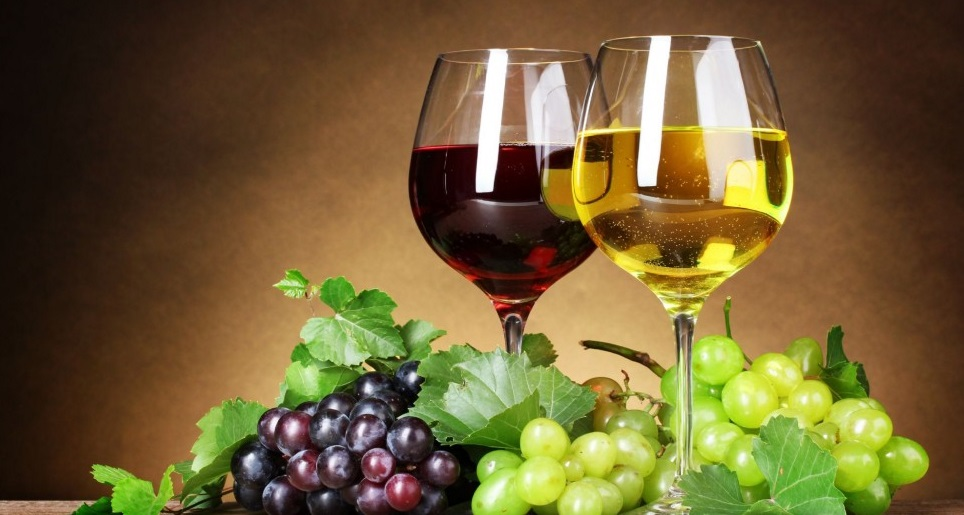

<a name="index"></a>
<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            Índice
        </b>
    <br/>&nbsp;
</center>

[Extra Trees Classifier](#etc)<br>
[Multi-layer Perceptron (MLP)](#rna)

# BUSINESS UNDERSTANDING

In [143]:
# Case de dados para CLASSIFICAÇÃO
# Identificar o tipo de vinho de acordo com as características de vinho tinto e branco presente na base de dados

# DATA UNDERSTANDING

In [144]:
# IA -> MACHINE LEARNING
# MODELO SUPERVISIONADO -> MÉTODO CLASSIFICAÇÃO
# Dados disponibilizadas no kaggle para efeito de estudo sobre o tipo de vinho com base nas características
# Obs1: Verificar se todos os atributos são importantes para o modelo

[Wine dataset](https://www.kaggle.com/datasets/dell4010/wine-dataset)

# Title

In [145]:
# Classificação de binhos tinto e branco

# Head

In [146]:
# estudando machine learning
# by geanclm em 20/02/2022 at 11:47h
# update by geanclm on 24/10/2023

# Local files

In [147]:
!dir

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 9241-82D4

 Pasta de C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning

21/12/2023  11:20    <DIR>          .
15/12/2023  13:52    <DIR>          ..
24/10/2023  09:36                68 .gitattributes
29/11/2023  09:27    <DIR>          .ipynb_checkpoints
21/12/2023  11:20           809.516 CLASSIFICA€ÇO_Wine_Kaggle_csv.ipynb
24/10/2023  09:36             1.091 LICENSE
24/10/2023  09:36                50 README.md
01/11/2023  13:01           131.951 Vinho-Tinto-e-Vinho-Branco.jpg
07/11/2023  16:35         9.618.537 wine_classifier_etc_2023-11-07.joblib
24/10/2023  09:36           384.016 wine_dataset.csv
               7 arquivo(s)     10.945.229 bytes
               3 pasta(s)   842.000.470.016 bytes dispon¡veis


# Library installation

In [431]:
# !pip install -U imbalanced-learn
# !pip install imblearn
# !pip install pyod

# !pip install tensorflow
# !pip install --upgrade tensorflow

# Import libs

In [2]:
# para verificar dados relativos a versão utilizada
import sys
import sklearn

# função utilizada para registrar data e hora no nome do modelo salvo
from datetime import datetime

# principais bibliotecas para lidar com dados
import pandas as pd
import numpy as np

# gerar gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree # Gráfico da Árvore

# função para gerar o MODELO de machine learning
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# trabalhar com os dados com rede neural
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

# Validação cruzada
from sklearn.model_selection import GridSearchCV

# função para MÉTRICA de validação do modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

# função para VALIDAÇÃO do modelo
from sklearn.model_selection import train_test_split as tts

# balancemaneto dos dados em relação ao MAIOR valor de y
# from imblearn import under_sampling, over_sampling # verificar se realmente é necessária essa linha - reduntante!!!
from imblearn.over_sampling import SMOTE

# balancemaneto dos dados em relação ao MENOR valor de y
from imblearn.under_sampling import RandomUnderSampler

# Padronizar os dados
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
from sklearn.preprocessing import MinMaxScaler

# biblioteca para persistir o modelo
import joblib

# identificar outliers
from pyod.models.knn import KNN

# Configuração da Validação Cruzada
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

# Combinação dos modelos
from sklearn.ensemble import VotingClassifier

In [150]:
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [151]:
print(sklearn.__version__)

1.2.2


# Load data

In [3]:
df = pd.read_csv(r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_dataset.csv')

# Exploratory Analysis

In [7]:
df.sample(15).T

,770,1158,179,6087,4419,3390,3756,5305,5920,4133,266,2309,4191,307,4657
fixed_acidity,7.1,6.7,8.8,6.7,6.7,6.4,8.5,6.6,6.3,6.8,8.1,6.1,7.3,10.3,6.2
volatile_acidity,0.59,0.41,0.61,0.48,0.325,0.33,0.25,0.15,0.28,0.23,0.87,0.25,0.32,0.41,0.25
citric_acid,0.02,0.43,0.14,0.49,0.82,0.24,0.27,0.34,0.22,0.3,0.0,0.24,0.29,0.42,0.38
residual_sugar,2.3,2.8,2.4,2.9,1.2,1.6,4.7,1.0,11.5,1.7,3.3,12.1,1.5,2.4,7.9
chlorides,0.082,0.076,0.067,0.03,0.152,0.054,0.031,0.037,0.036,0.043,0.096,0.046,0.038,0.213,0.045
free_sulfur_dioxide,24.0,22.0,10.0,28.0,49.0,25.0,31.0,45.0,27.0,19.0,26.0,51.0,32.0,6.0,54.0
total_sulfur_dioxide,94.0,54.0,42.0,122.0,120.0,117.0,92.0,79.0,150.0,95.0,61.0,172.0,144.0,14.0,208.0
density,0.99744,0.99572,0.9969,0.98926,0.99312,0.9943,0.9922,0.98949,0.99445,0.99207,1.00025,0.998,0.99296,0.9994,0.99572
pH,3.55,3.42,3.19,3.13,2.99,3.36,3.01,2.96,3.0,3.17,3.6,3.35,3.2,3.19,3.17
sulphates,0.53,1.16,0.59,0.4,0.38,0.5,0.33,0.5,0.33,0.46,0.72,0.45,0.55,0.62,0.46


In [154]:
# filtrar dado específico do data frame
df.loc[0:4,'style']

0    red
1    red
2    red
3    red
4    red
Name: style, dtype: object

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [156]:
df.dtypes[df.dtypes.values == 'object'].index

Index(['style'], dtype='object')

In [157]:
df.shape

(6497, 13)

In [158]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [159]:
# verificar a existência de dados nulos
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

In [160]:
# Em caso de haver dados nulos analisar melhor estratégia para a situação pontual

# DATA PREPARATION

In [8]:
df['style'] = df['style'].replace('red', 0) # vinho tinto
df['style'] = df['style'].replace('white', 1) # vinho branco

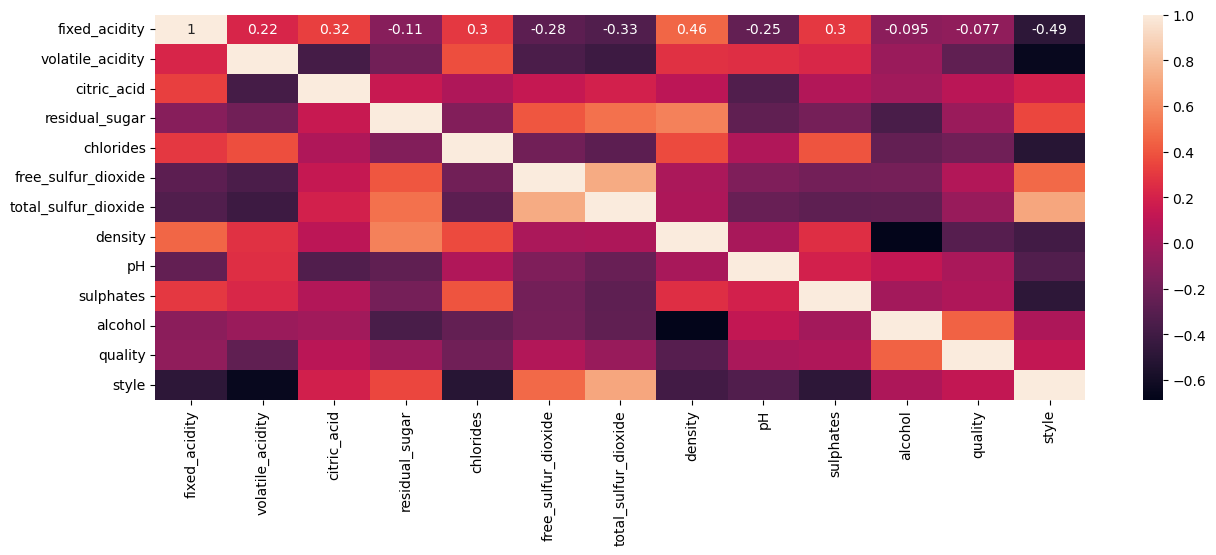

In [9]:
# Analisar a correlação entre as variáveis da base de dados
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True);

In [163]:
# 1 - VERIFICAR NECESSIDADE DE APLICAR O GET DUMMIES para cada base de dados
# df_d = pd.get_dummies(df)
# df_d.sample(5)

# DATA VISUALIZATION

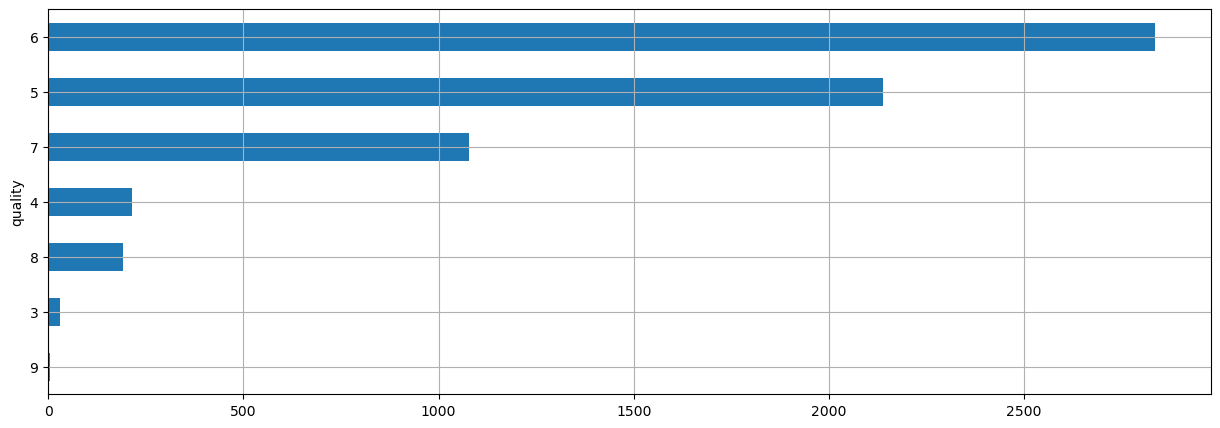

In [164]:
# wine ranking
plt.figure(figsize=(15,5))
df['quality'].value_counts(ascending=True).plot.barh()
plt.grid()
plt.show();

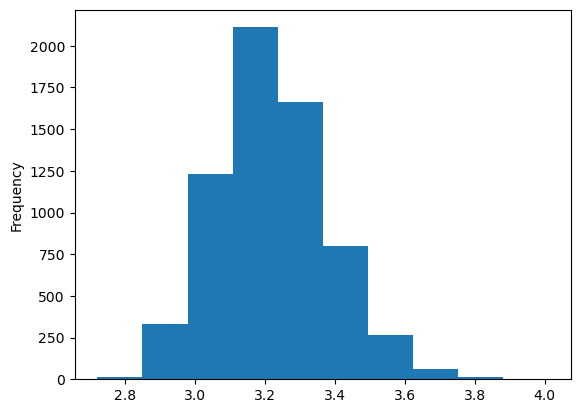

In [165]:
# frequência geral de pH dos vinhos
df['pH'].plot.hist();

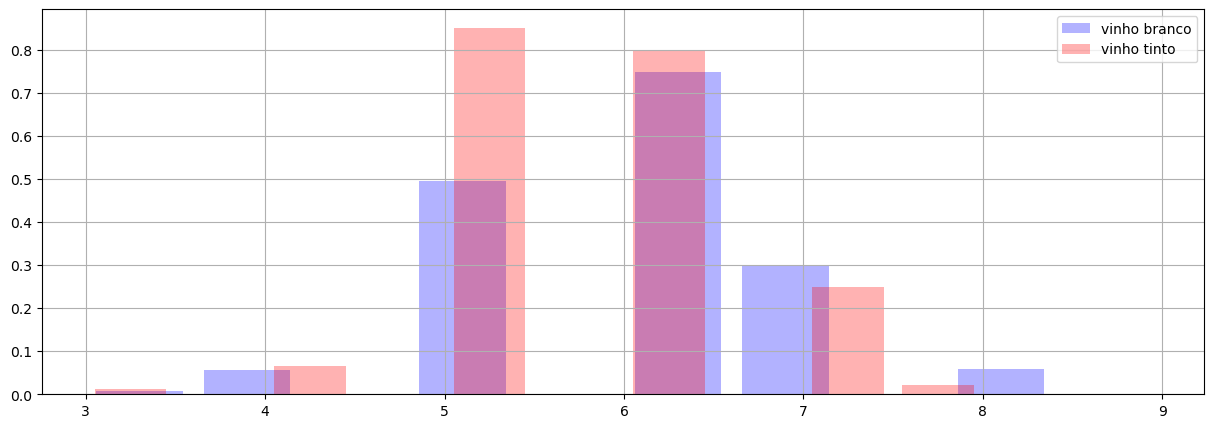

In [166]:
# ANALISANDO a qualidade geral dos vinhos em relação a característica tinto e branco
# (df.loc[df['style']== 1]).hist(figsize=(15,5));
# df['quality'].hist()

# min = df['quality'].min()
# max = df['quality'].max()
# bins = np.linspace(min,max, 6)

plt.figure(figsize=(15,5))
(df['quality'].loc[df['style']== 1]).hist(rwidth=0.80, color='b', alpha=.3, density=True, label='vinho branco') # vinhos branco
(df['quality'].loc[df['style']== 0]).hist(rwidth=0.80, color='r', alpha=.3, density=True, label='vinho tinto') # vinhos tinto;
plt.legend();

# Análise dos outliers (df)

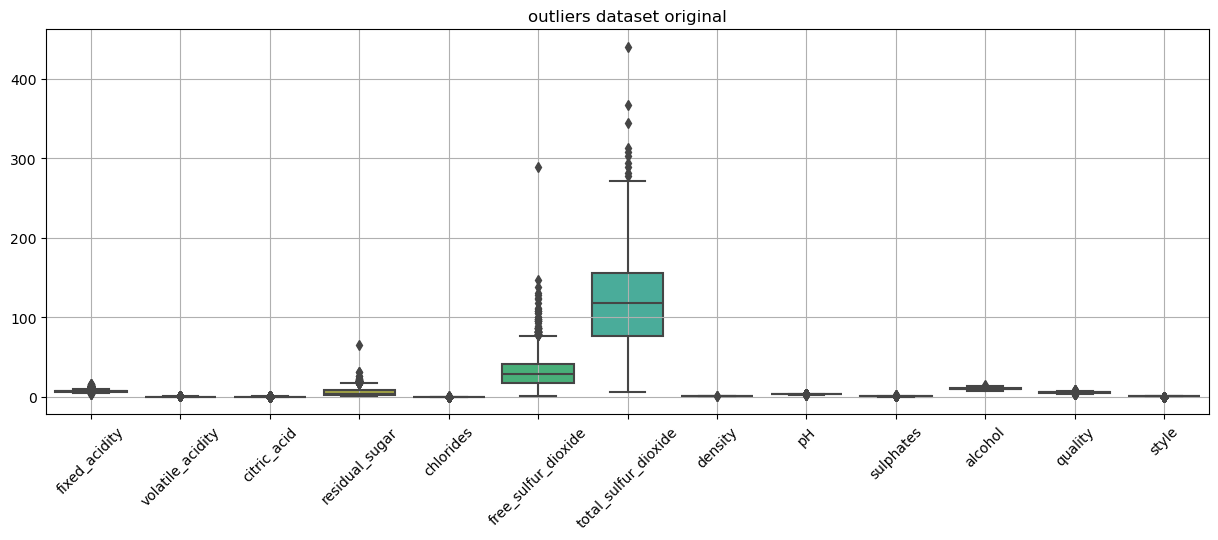

In [11]:
# Outliers data frame df
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('outliers dataset original')
plt.grid()
plt.show();

In [12]:
# LIMITE INFERIOR E SUPERIOR DO BOX PLOT DE VARIÁVEL ESPECÍFICA
var = 'total_sulfur_dioxide'
q1 = df[var].quantile(0.25)
q2 = df[var].quantile(0.5)
q3 = df[var].quantile(0.75)
amplitude = q3 - q1
limite_inferior = q1 - (1.5 * amplitude)
limite_superior = q3 + (1.5 * amplitude)
menor_valor_serie = df[var].min()
maior_valor_serie = df[var].max()
quant_dados_ALS = df.loc[df[var] > limite_superior].count()[0] # quantidade de dados acima do limite superior
quant_dados_BLI = df.loc[df[var] < limite_inferior].count()[0] # quantidade de dados abaixo do limite inferior
perc_ALS = (((df.loc[df[var] > limite_superior]).count()[0] / df[var].count())) * 100
perc_BLI = (((df.loc[df[var] < limite_inferior]).count()[0] / df[var].count())) * 100
box_splot = {
        'perc_BLI':[perc_BLI],
        'quant_dados_BLS':[quant_dados_BLI],
        'menor_valor_serie':[menor_valor_serie],
        'LI_box_splot':[limite_inferior],
        'q1':[q1],
        'q2':[q2],
        'q3':[q3],
        'LS_box_splot':[limite_superior],
        'maior_valor_serie':[maior_valor_serie],
        'quant_dados_ALS':[quant_dados_ALS],
        'perc_ALS':[perc_ALS]        
}
df_box_splot = pd.DataFrame(box_splot)
df_box_splot

C:\Users\geanc\AppData\Local\Temp\ipykernel_12940\505867337.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  quant_dados_ALS = df.loc[df[var] > limite_superior].count()[0] # quantidade de dados acima do limite superior
C:\Users\geanc\AppData\Local\Temp\ipykernel_12940\505867337.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  quant_dados_BLI = df.loc[df[var] < limite_inferior].count()[0] # quantidade de dados abaixo do limite inferior
C:\Users\geanc\AppData\Local\Temp\ipykernel_12940\505867337.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys 

,perc_BLI,quant_dados_BLS,menor_valor_serie,LI_box_splot,q1,q2,q3,LS_box_splot,maior_valor_serie,quant_dados_ALS,perc_ALS
0,0.0,0,6.0,-41.5,77.0,118.0,156.0,274.5,440.0,10,0.153917


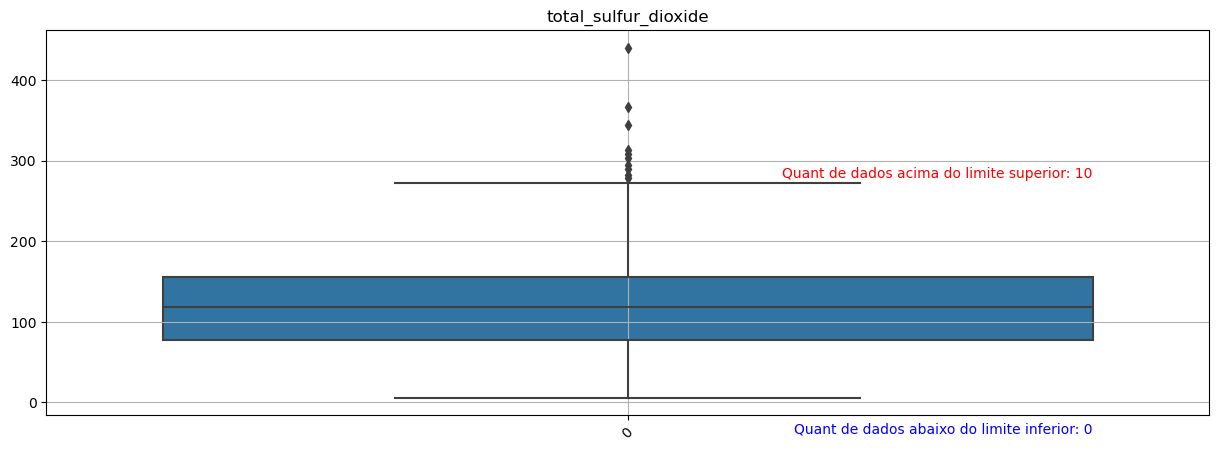

In [13]:
# Outliers var
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df[var])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title(var)
plt.text(0.4, limite_superior, f"Quant de dados acima do limite superior: {quant_dados_ALS}", ha='right',
         va='bottom', fontsize=10, color='red')
plt.text(0.4, limite_inferior, f"Quant de dados abaixo do limite inferior: {quant_dados_BLI}", ha='right',
         va='bottom', fontsize=10, color='blue')
plt.grid()
plt.show();

In [15]:
# Outliers acima do limite superior boxsplot var
df.loc[df[var] > limite_superior]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
1079,7.9,0.30,0.68,8.30,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7,0
1081,7.9,0.30,0.68,8.30,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7,0
1924,7.5,0.27,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5,1
3016,8.6,0.55,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3,1
3530,7.1,0.49,0.22,2.00,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3,1
3726,9.1,0.33,0.38,1.70,0.062,50.5,344.0,0.99580,3.10,0.70,9.5,5,1
3977,9.4,0.23,0.56,16.45,0.063,52.5,282.0,1.00098,3.10,0.51,9.3,5,1
4253,6.9,0.40,0.22,5.95,0.081,76.0,303.0,0.99705,3.40,0.57,9.4,5,1
4751,7.6,0.25,1.23,4.60,0.035,51.0,294.0,0.99018,3.03,0.43,13.1,6,1
6344,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,1


In [16]:
# Instanciando o objeto KNN para detectar os outlers df
# Obs: uma das formas de tratar outliers mas que não é a mais adequada ou a certa, pois depende do contexto dos dados
detector = KNN()

# Treinar o detector de OUTLIERS
detector.fit(df)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [17]:
# 0 -> NÃO é outlier
# 1 -> outlier
previsoes = detector.labels_
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
# Fazendo uma contagem para identificar os outliers
np.unique(previsoes, return_counts = True)

(array([0, 1]), array([5847,  650], dtype=int64))

In [19]:
# Cálculo da distância realizado para identificação do outlier
confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([2.12212299, 2.71635787, 2.18040046, ..., 2.34466423, 3.08154044,
       2.51754346])

In [20]:
# Lista outliers
outliers = []
for i in range(len(previsoes)):    
    if previsoes[i] == 1:
        outliers.append(i)

# Filtrar as linhas outlier df
df_outliers = df.iloc[outliers,:]

In [21]:
# salvar versão df sem os outliers
df_sem_outliers = df.loc[~df.index.isin(outliers)]

In [22]:
# df_sem_outliers

In [23]:
df.shape, df_sem_outliers.shape

((6497, 13), (5847, 13))

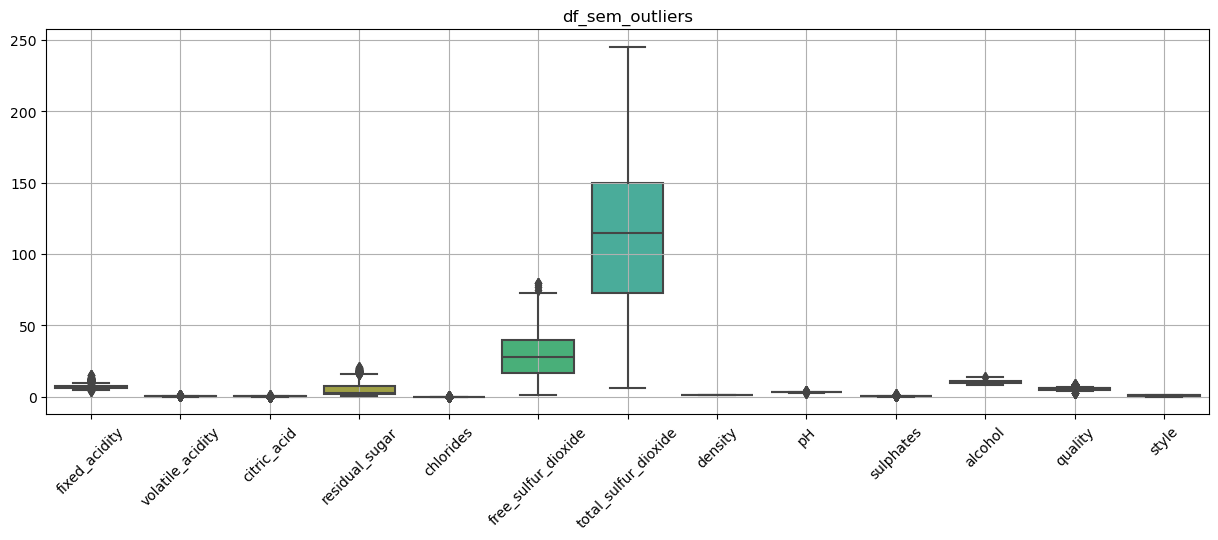

In [24]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df_sem_outliers)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('df_sem_outliers')
plt.grid()
plt.show();

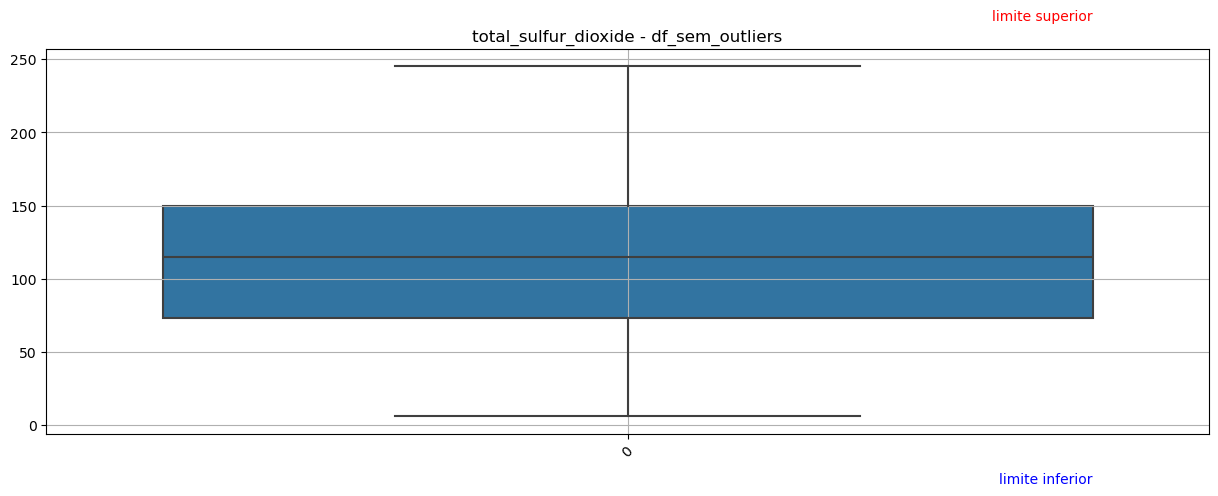

In [25]:
# Análise variável após tratamento dos outliers
var = 'total_sulfur_dioxide'
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df_sem_outliers[var])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title(f'{var} - df_sem_outliers')
plt.text(0.4, limite_superior, f"limite superior", ha='right', va='bottom', fontsize=10, color='red')
plt.text(0.4, limite_inferior, f"limite inferior", ha='right', va='bottom', fontsize=10, color='blue')
plt.grid()
plt.show();

# MODELING

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            MODELING
        </b>
    <br/>&nbsp;
</center>

In [26]:
# dividir em df MODEL para treinar e testar o modelo e df VALIDAÇÃO para fins de simulando o mundo real
df_model, df_validation = tts(df_sem_outliers, test_size=0.10)

In [27]:
# Divisão dos dados em X e y a partir do df_tr (corresponde a 70% da base utilizada para treinar o modelo)
X = df_model.drop('style', axis = 1)
y = df_model['style']
X.shape, y.shape

((5262, 12), (5262,))

In [28]:
# Variável de validação final para o modelo gerado (corresponde a 30% dos dados simulando mundo real)
X_val = df_validation.drop('style', axis = 1)
y_val = df_validation['style']

In [29]:
df.groupby('style').size()[0], df.groupby('style').size()[1]

(1599, 4898)

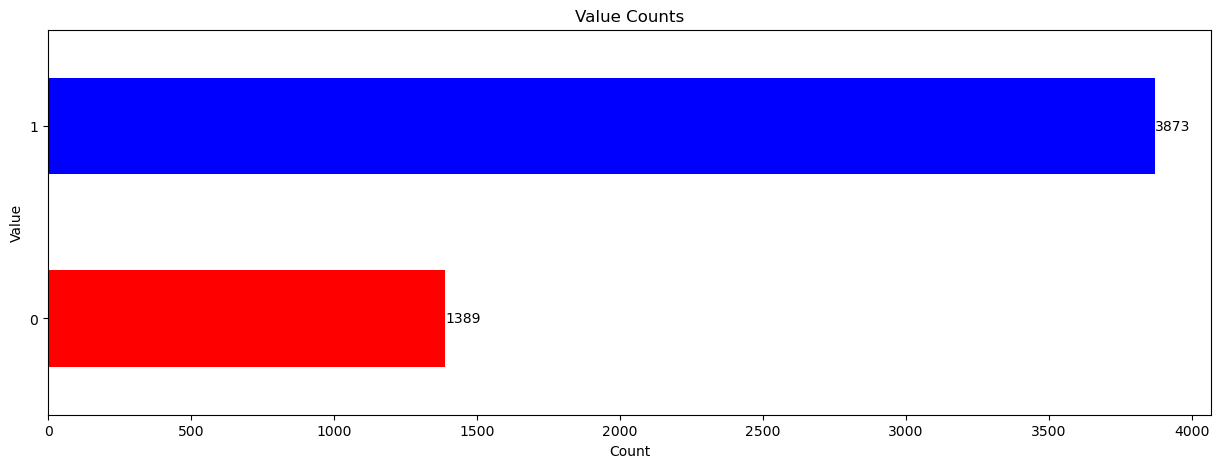

In [30]:
plt.figure(figsize=(15,5))
ax = y.value_counts(ascending=True).plot(kind ='barh', color = ['red','blue'])
ax.set_xlabel('Count')
ax.set_ylabel('Value')
ax.set_title('Value Counts')
ax.bar_label(ax.containers[0], label_type='edge');

In [31]:
# quantidade de 0 e 1 na variável y do df
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1389, 3873], dtype=int64))

In [32]:
percentual_0 = np.bincount(y)[0] / len(y) * 100
percentual_1 = np.bincount(y)[1] / len(y) * 100
percentual_0, percentual_1

(26.396807297605474, 73.60319270239452)

# Data balancing

In [33]:
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!

# balancemaneto dos dados com a geração de dados aleatórios na base minoritária de y
smote_ball = SMOTE()
X_bal, y_bal = smote_ball.fit_resample(X, y)

# balancemaneto dos dados com a remoção de dados da base majoritária de y
# rus = RandomUnderSampler()
# X_bal, y_bal = rus.fit_resample(X, y)

In [34]:
# y_bal.value_counts()

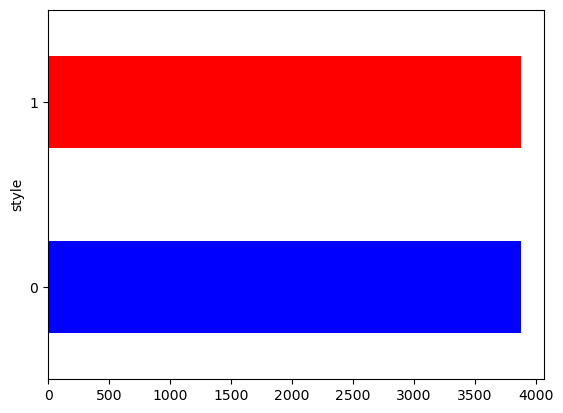

In [35]:
# variável y, balanceada, utilizada para TREINAR o modelo
y_bal.value_counts(ascending=True).plot(kind = 'barh', color = ['blue', 'red']);

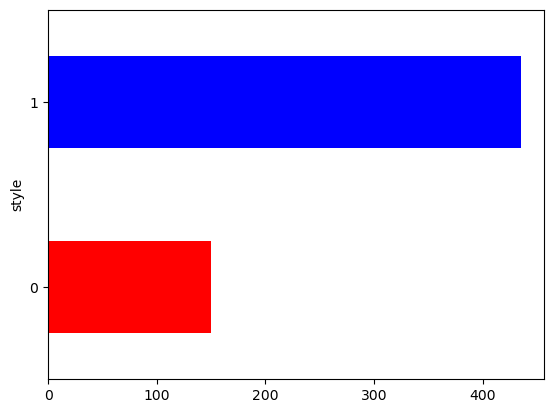

In [36]:
# Variável y, base de validação, utilizada para aplicar situações novas ao modelo já treinado e simulando vida real
y_val.value_counts(ascending=True).plot(kind = 'barh', color = ['red','blue']);

# Standardization

In [37]:
# Padronizar X_bal do X do df_tr
obj_padronizado = StandardScaler().fit(X_bal)
X_bal_padronizado = obj_padronizado.transform(X_bal)
X_bal_padronizado = pd.DataFrame(X_bal_padronizado)
X_bal_padronizado.columns = list(X_bal.columns)

In [38]:
X_bal_padronizado.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
7741,0.474593,-0.321255,-0.189590,-0.629102,0.176704,-0.002902,-0.565151,0.568153,0.036225,2.596216,-0.561811,-0.836377
7742,0.579124,3.112881,-1.552701,-0.645285,0.556485,-1.414691,-1.374181,0.645386,1.035021,0.001967,-0.286342,-0.836377
7743,0.541232,1.639838,-0.690232,-0.461308,0.290089,-0.949802,-0.913236,0.803026,0.430586,0.498312,-0.953049,-0.836377
7744,-0.277188,0.887240,-1.184805,-0.615393,0.741972,-0.692853,-0.917250,0.497228,0.687079,0.014348,-1.278039,0.355633
7745,0.864311,-0.662745,1.015160,-0.622490,0.159707,-1.165275,-1.374181,-0.574125,-0.000149,-0.048148,1.636264,1.547644


In [194]:
# df_padronizado.describe().T

In [195]:
# plt.figure(figsize=(15,5))
# ax = sns.boxplot(data=df_padronizado)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [196]:
# Padronizar X_val (origem no df_ts correspondente a 30% dos dados do df para teste do modelo)
obj_padronizado = StandardScaler().fit(X_val)
X_val_padronizado = obj_padronizado.transform(X_val)
X_val_padronizado = pd.DataFrame(X_val_padronizado)
X_val_padronizado.columns = list(X_val.columns)
X_val_padronizado.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
580,0.742730,-0.474081,0.352027,-0.730106,-0.025737,0.029245,0.177501,-0.884903,-0.799220,1.159744,0.925957,1.365629
581,-0.889264,1.164455,-1.645966,-0.752187,0.665466,-0.364054,-1.259443,0.232498,2.187345,0.905809,-0.172218,0.195947
582,1.429885,1.528574,-0.932397,-0.531372,1.026093,-1.150653,-0.711135,0.947906,-0.506420,0.017038,-0.932494,-0.973735
583,-0.373898,-0.170648,-0.932397,0.528541,-0.356312,1.799093,1.671166,0.361953,-0.330739,-0.617799,-0.932494,0.195947
584,-0.288003,1.407201,-0.147471,-0.685943,-0.446469,-0.954004,-0.654414,-0.271695,0.547662,1.286711,-0.256693,-0.973735


# Normalization

In [197]:
# obj_normalizado = MinMaxScaler().fit(X_bal)
# df_normalizado = obj_normalizado.transform(X_bal)
# df_normalizado = pd.DataFrame(df_normalizado)
# df_normalizado.columns = list(X_bal.columns)
# df_normalizado.head()

In [198]:
# df_normalizado.describe().T

In [199]:
# plt.figure(figsize=(15,5))
# ax = sns.boxplot(data=df_normalizado)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

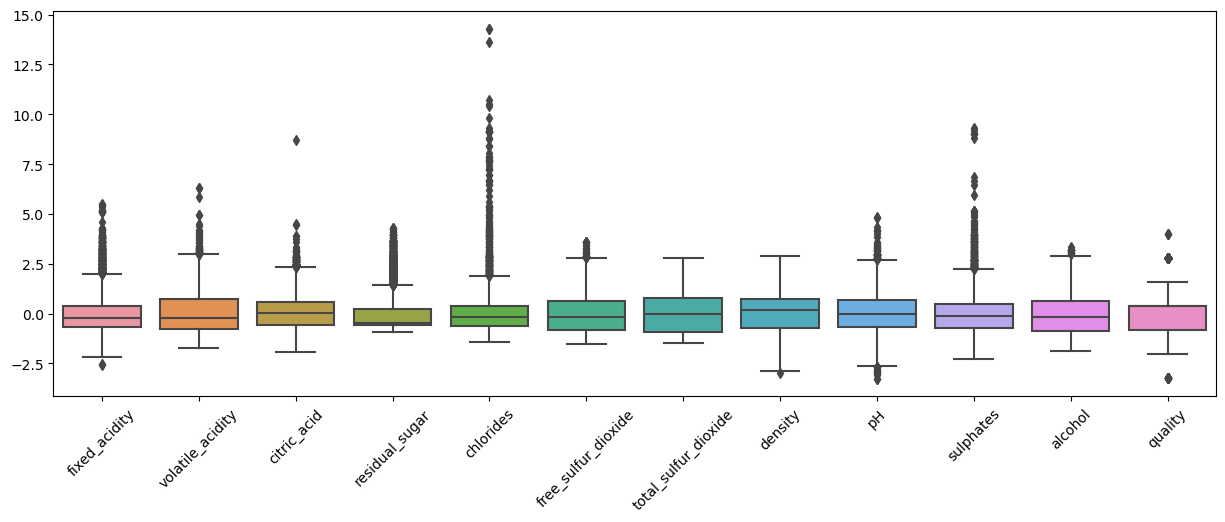

In [200]:
# Analisar os outliers
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=X_bal_padronizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show();

# VALIDAÇÃO HOLDOUT
# Separar df_model - balanceado e padronizado - em X_tr, X_ts, y_tr, y_ts

In [39]:
# Separar df_model - balanceado e padronizado - em X_tr, X_ts, y_tr, y_ts
PREDICTOR = X_bal_padronizado
TARGET = y_bal
X_tr, X_ts, y_tr, y_ts = tts(PREDICTOR,TARGET, test_size= 0.3)

In [40]:
X_tr.shape, X_ts.shape, y_tr.shape, y_ts.shape, y_tr.value_counts()[0], y_tr.value_counts()[1]

((5422, 12), (2324, 12), (5422,), (2324,), 2722, 2700)

# Extra Trees Classifier

<a name="etc"></a>
<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Extra Trees Classifier
        </b>
    <br/>&nbsp;
</center>

<div style="overflow: auto;">
    <div style="float: left;">
        <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html">
            Consultar documentação "ExtraTreesClassifier"
        </a>
    </div>
    <div style="float: right;">
        <a href="#index">
            Índice Notebook
        </a>
    </div>
</div>

In [203]:
# Treinar o modelo
# etc = ExtraTreesClassifier(n_estimators=500, max_depth=10, n_jobs=-1)
# etc.fit(X_tr, y_tr)
# etc_y_pred = etc.predict(X_ts)

In [204]:
# Treinar o modelo
params = {    
    'n_estimators': np.arange(250, 750, 250),
    'max_depth': np.arange(5, 15, 5),
    'n_jobs': np.array([-1])
}
etc = GridSearchCV(
    ExtraTreesClassifier(),
    params,                                    
    cv=10,                                     
    scoring='roc_auc',
#     verbose=5,
)
etc.fit(X_tr, y_tr)

GridSearchCV(cv=10, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': array([ 5, 10]),
                         'n_estimators': array([250, 500]),
                         'n_jobs': array([-1])},
             scoring='roc_auc')

In [205]:
etc.best_params_, etc.best_score_, etc.best_estimator_, etc.best_index_

({'max_depth': 10, 'n_estimators': 500, 'n_jobs': -1},
 0.999144044576977,
 ExtraTreesClassifier(max_depth=10, n_estimators=500, n_jobs=-1),
 3)

In [206]:
etc_y_pred = etc.predict(X_ts)

In [207]:
# PROPENSÃO respectiva, nas colunas, da variável resposta ser 0 e 1
etc.predict_proba(X_ts)

array([[0.15481079, 0.84518921],
       [0.94597372, 0.05402628],
       [0.98632761, 0.01367239],
       ...,
       [0.02272436, 0.97727564],
       [0.98475707, 0.01524293],
       [0.98312106, 0.01687894]])

In [208]:
# Data frame PROPENSÃO respectiva, nas colunas, da variável resposta ser 0 e 1
pd.DataFrame(etc.predict_proba(X_ts), columns=['Propensão 0', 'Propensão 1']).head()

,Propensão 0,Propensão 1
0,0.154811,0.845189
1,0.945974,0.054026
2,0.986328,0.013672
3,0.019477,0.980523
4,0.928054,0.071946


In [1]:
# EVALUATION

In [209]:
# Max e Min
etc_y_pred.min(), etc_y_pred.max()

(0, 1)

In [210]:
# Curva ROC
roc_auc_score(y_ts, etc_y_pred)

0.9961240310077519

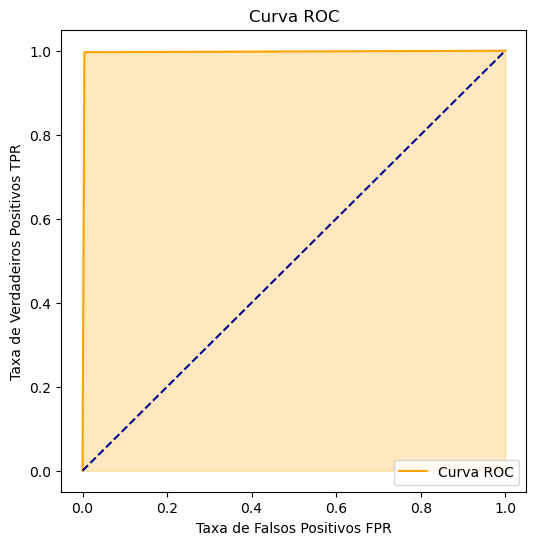

AUC: 1.00


In [211]:
# Calculando a curva ROC
# A curva ROC é um gráfico que representa a taxa de verdadeiros positivos (TPR)
# em função da taxa de falsos positivos (FPR) para diferentes valores de limiar de classificação.

fpr, tpr, thresholds = roc_curve(y_ts, etc_y_pred)

# Plotando a curva ROC
color = 'orange'
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color=color, label='Curva ROC')
plt.fill_between(fpr, tpr, color=color, alpha=.25)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos FPR')
plt.ylabel('Taxa de Verdadeiros Positivos TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Calculando a área sob a curva (AUC)
# A área sob a curva ROC (AUC-ROC) é uma métrica resumida que quantifica o desempenho global do modelo.
# Um valor de AUC-ROC próximo a 1 indica um bom modelo, enquanto um valor próximo a 0,5 indica um desempenho aleatório.
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc:.2f}')

In [212]:
# SCORE
etc_acuracia = etc.score(X_ts, y_ts)
print("score AUTO:", etc_acuracia)

score AUTO: 0.9993920266840565


In [213]:
# ACURÁCIA
etc_acuracia = accuracy_score(y_ts, etc_y_pred)
print("accuracy_score AUTO:", etc_acuracia)

accuracy_score AUTO: 0.9961240310077519


In [214]:
# média dos acertos do modelo em relação aos valores corretos da base de dados
np.mean(y_ts == etc_y_pred)

0.9961240310077519

In [215]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
etc_recall = recall_score(y_ts, etc_y_pred)
print("etc_recall:", etc_recall)

etc_recall: 0.9965546942291128


In [216]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
etc_precision = precision_score(y_ts, etc_y_pred)
print("precision_score:", etc_precision)

precision_score: 0.995697074010327


In [217]:
# MATRIZ CONFUSÃO
etc_confusion_matrix = confusion_matrix(y_ts, etc_y_pred)
etc_confusion_matrix

array([[1156,    5],
       [   4, 1157]], dtype=int64)

|                     |  PRED = 0          |           PRED = 1   |
|-                    |--------------------|----------------------|
| *REAL = 0*          |      VN            |             FP       |
| *REAL = 1*          |      FN            |             VP       |

In [218]:
# CÁLCULO MANUAL DA ACURÁCIA
# com base nos valores da matriz confusão
etc_acuracia_manual = (etc_confusion_matrix[0][0] + etc_confusion_matrix[1][1])/(etc_confusion_matrix[0][0] + etc_confusion_matrix[0][1] + etc_confusion_matrix[1][0] + etc_confusion_matrix[1][1])
print(f'Acurácia MANUAL:, {etc_acuracia_manual}')

Acurácia MANUAL:, 0.9961240310077519


In [219]:
# print(classification_report(y_ts, etc_y_pred))

In [220]:
etc_f1_score = f1_score(y_ts, etc_y_pred)
etc_f1_score

0.9961256995264743

In [221]:
# X_ts[400:410].T
X_val_padronizado[400:410].T

,400,401,402,403,404,405,406,407,408,409
fixed_acidity,-0.459792,-0.975159,-0.030320,0.399152,0.313258,-0.030320,-0.717475,0.227363,-0.631581,-0.116214
volatile_acidity,-0.534767,-0.231335,0.618276,3.409855,-0.898886,0.557590,-0.716827,0.132784,1.407201,2.408528
citric_acid,0.708812,0.137957,2.207307,-1.788680,1.279667,-1.003754,0.209314,0.137957,-2.074108,-1.860037
residual_sugar,0.462297,-0.708024,1.433884,-0.619698,-0.818432,-0.774269,-0.067660,-0.862595,-0.774269,-0.730106
chlorides,-0.356312,-0.386365,-0.326260,0.725570,-0.236103,0.815727,-0.686888,-0.897254,0.364943,0.785675
free_sulfur_dioxide,-0.036305,0.094795,1.471344,-1.609503,0.815844,-0.167404,0.422545,-0.167404,-1.675053,-1.085103
total_sulfur_dioxide,0.744716,0.290944,0.763623,-1.921193,0.536737,-1.146000,-0.351899,-1.070371,-1.902286,-1.089279
density,0.000841,-1.688886,0.988787,0.716250,-0.476098,0.593609,-1.525364,-1.055238,0.818451,0.682183
pH,-0.447860,0.547662,-0.623540,0.957583,1.016143,1.543184,0.254862,-0.096499,1.367504,0.957583
sulphates,0.397940,-0.744767,-0.490832,0.144005,-0.427348,0.651874,-1.125669,-1.316120,0.905809,0.207489


# Testar o modelo com dados da base df_validation

In [222]:
# segmento da base y_ts que serve para validar o modelo
# selection_y_ts = list(y_ts[400:410].values)
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print (validation, end=' ')

In [223]:
len(validation)

585

In [224]:
# aplicação do modelo para predizer resultados com base na base treino e modelo gerado
prediction = list(etc.predict(X_val_padronizado[start:end]))
# prediction = list(etc.predict(X_ts[400:410]))
# print(prediction, end=' ')

In [225]:
len(prediction)

585

In [226]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    etc_y_val = dfp.prediction.shape[0]
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    display(dfp.prediction.value_counts())
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

585 registros lidos
21 tipo(s) de vinho(s) NÃO previstos corretamente!


prediction
0    20
1     1
Name: count, dtype: int64

,seq,validation,prediction
16,500,1,0
17,530,0,1
18,555,1,0
19,578,1,0
20,584,1,0


In [227]:
# MATRIZ CONFUSÃO - df Validação
etc_y_pred_val = etc.predict(X_val_padronizado)
confusion_matrix(y_val, etc_y_pred_val)

array([[146,   1],
       [ 20, 418]], dtype=int64)

# VISUAL

In [228]:
# PROPENSÃO (NÃO É probabilidade)
pred = etc.predict_proba(X_ts)[:,1]

In [229]:
pred.min(), pred.max()

(0.0021365195843728074, 0.9981381186137342)

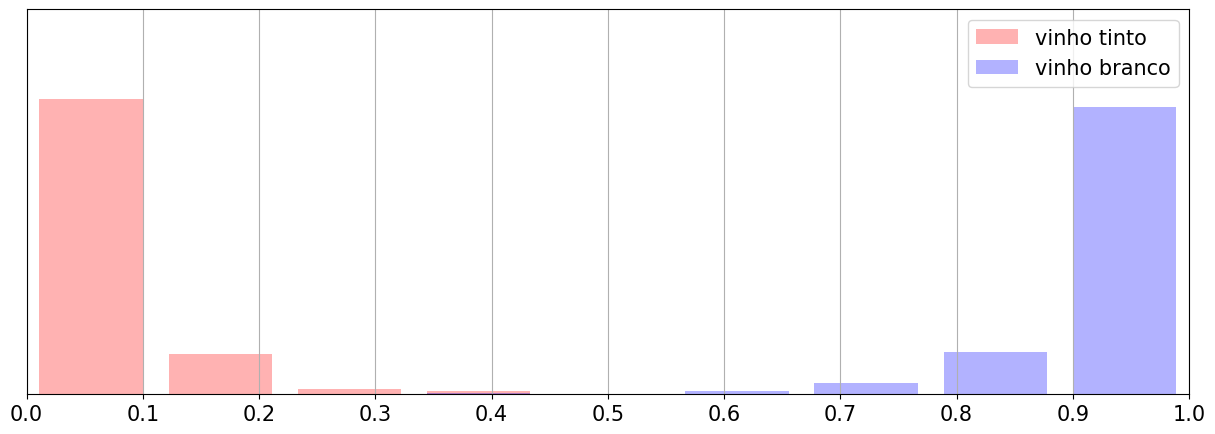

In [230]:
plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==0], bins=np.linspace(0,1,10), density=True, color='r', alpha=.3, rwidth=.8, label='vinho tinto')
plt.hist(pred[y_ts==1], bins=np.linspace(0,1,10), density=True, color='b', alpha=.3, rwidth=.8, label='vinho branco')

plt.xlim(0, 1)
plt.ylim(0, 10)

plt.xticks(np.arange(0,1.1,0.1), fontsize=15)
plt.yticks([])
plt.legend(fontsize=15)
plt.grid();

# PERSISTENCE

In [231]:
# Salvar modelo em arquivo
# current_date = datetime.today().strftime('%Y-%m-%d')
# name = "wine_classifier_etc_"
# file_name = f'{name}{current_date}.joblib'
# file_path = fr'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\{file_name}'
# joblib.dump(etc, file_path)

In [232]:
# Carregar Modelo Salvo
# model = joblib.load(r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_classifier_etc.joblib')
# prediction_persistence = model.predict(X_ts[400:410])
# print(list(prediction_persistence))

# DEPLOYMENT

In [233]:
# Criar tela no Streamlit para aplciar o modelo em situação de produção
# receber arquivo com dados em upload e retornar resultado na tela com tipo de vinho

In [234]:
# INSIGHTS

In [235]:
# 1 - verificar dados outliers
# 2 - a base pode conter a nacionalidade e outras características que podem ajudar na classificação

# KNeighbors Classifier

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            KNeighbors Classifier
        </b>
    <br/>&nbsp;
</center>

[KNeighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [41]:
# Treinar o modelo
params = {
    'n_neighbors': np.arange(3, 11, 2)
}
neigh = GridSearchCV(
    KNeighborsClassifier(),
    params,                                    
    cv=10,                                     
    scoring='roc_auc',
#     verbose=5,
)

In [42]:
print(neigh)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([3, 5, 7, 9])},
             scoring='roc_auc')


In [43]:
neigh.fit(X_tr, y_tr)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([3, 5, 7, 9])},
             scoring='roc_auc')

In [44]:
neigh.best_params_, neigh.best_score_, neigh.best_estimator_, neigh.best_index_

({'n_neighbors': 9},
 0.9983695718315817,
 KNeighborsClassifier(n_neighbors=9),
 3)

In [45]:
neigh_y_pred = neigh.predict(X_ts)

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            Validação K-FOLD
        </b>
    <br/>&nbsp;
</center>

In [46]:
# ENTENDO O KFold
X_praticar_lib = np.arange(10)

kf = KFold(3, shuffle=True)
for linhas_treino, linhas_teste in kf.split(X_praticar_lib):
    print (f'teino {linhas_treino} | teste {linhas_teste}')

teino [1 2 5 6 7 8] | teste [0 3 4 9]
teino [0 2 3 4 7 8 9] | teste [1 5 6]
teino [0 1 3 4 5 6 9] | teste [2 7 8]


In [47]:
# VALIDAÇÃO KFold
# validacao = KFold(n_splits = 10, shuffle = True)
# validacao = RepeatedKFold(n_splits = 10, n_repeats = 3)
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)
reglog = cross_validate(neigh, X_bal_padronizado, y_bal, cv = validacao, scoring = ['accuracy', 'recall', 'precision','f1'])

print('     Acurácia:', round(reglog['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(reglog['test_recall'].mean(), 4))
print('     Precisão:', round(reglog['test_precision'].mean(), 4))
print('     F1 Score:', round(reglog['test_f1'].mean(), 4))

     Acurácia: 0.9921
Sensibilidade: 0.9913
     Precisão: 0.9929
     F1 Score: 0.9921


In [48]:
# MATRIZ CONFUSÃO
neigh_confusion_matrix = confusion_matrix(y_ts, neigh_y_pred)
neigh_confusion_matrix

array([[1141,   10],
       [  18, 1155]], dtype=int64)

In [49]:
# ACURÁCIA
neigh_acuracia = accuracy_score(y_ts, neigh_y_pred)
print("neigh_acuracia:", neigh_acuracia)

neigh_acuracia: 0.9879518072289156


In [337]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
neigh_recall = recall_score(y_ts, neigh_y_pred)
print("neigh_recall:", neigh_recall)

neigh_recall: 0.9913867355727821


In [338]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
neigh_precision = precision_score(y_ts, neigh_y_pred)
print("precision_score:", neigh_precision)

precision_score: 0.9965367965367965


In [339]:
print(classification_report(y_ts, neigh_y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1161
           1       1.00      0.99      0.99      1161

    accuracy                           0.99      2322
   macro avg       0.99      0.99      0.99      2322
weighted avg       0.99      0.99      0.99      2322



In [340]:
neigh_f1_score = f1_score(y_ts, neigh_y_pred)
neigh_f1_score

0.9939550949913645

# Testar o modelo com dados da base df_validation

In [341]:
# segmento da base y_ts que serve para validar o modelo
# selection_y_ts = list(y_ts[400:410].values)
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print (validation, end=' ')

In [342]:
# aplicação do modelo para predizer resultados com base na base treino e modelo gerado
prediction = list(neigh.predict(X_val_padronizado[start:end]))
# prediction = list(etc.predict(X_ts[400:410]))
# print(prediction, end=' ')

In [343]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    neigh_y_val = dfp.prediction.shape[0]
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO identificados corretamente!')
    display(dfp.prediction.value_counts())
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

585 registros lidos
28 tipo(s) de vinho(s) NÃO identificados corretamente!


prediction
0    27
1     1
Name: count, dtype: int64

,seq,validation,prediction
23,515,1,0
24,530,0,1
25,555,1,0
26,580,1,0
27,584,1,0


# Decision Tree Classifier

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Decision Tree Classifier
        </b>
    <br/>&nbsp;
</center>

[Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [344]:
params = {
    'max_leaf_nodes': np.power(2, (np.arange(1, 12, 1))),
    'criterion': ['gini','entropy']
}
dtc = GridSearchCV(
    DecisionTreeClassifier(),
    params,                                    
    cv=10,                                     
    scoring='roc_auc',
    verbose=5,
)

In [345]:
print(dtc)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024, 2048],
      dtype=int32)},
             scoring='roc_auc', verbose=5)


In [346]:
# Treinar o modelo
# dtc = DecisionTreeClassifier()
# dtc.fit(X_tr, y_tr)
dtc.fit(X_tr, y_tr)

Fitting 10 folds for each of 22 candidates, totalling 220 fits
[CV 1/10] END .criterion=gini, max_leaf_nodes=2;, score=0.917 total time=   0.0s
[CV 2/10] END .criterion=gini, max_leaf_nodes=2;, score=0.932 total time=   0.0s
[CV 3/10] END .criterion=gini, max_leaf_nodes=2;, score=0.921 total time=   0.0s
[CV 4/10] END .criterion=gini, max_leaf_nodes=2;, score=0.915 total time=   0.0s
[CV 5/10] END .criterion=gini, max_leaf_nodes=2;, score=0.948 total time=   0.0s
[CV 6/10] END .criterion=gini, max_leaf_nodes=2;, score=0.919 total time=   0.0s
[CV 7/10] END .criterion=gini, max_leaf_nodes=2;, score=0.924 total time=   0.0s
[CV 8/10] END .criterion=gini, max_leaf_nodes=2;, score=0.950 total time=   0.0s
[CV 9/10] END .criterion=gini, max_leaf_nodes=2;, score=0.928 total time=   0.0s
[CV 10/10] END criterion=gini, max_leaf_nodes=2;, score=0.937 total time=   0.0s
[CV 1/10] END .criterion=gini, max_leaf_nodes=4;, score=0.964 total time=   0.0s
[CV 2/10] END .criterion=gini, max_leaf_nodes=

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024, 2048],
      dtype=int32)},
             scoring='roc_auc', verbose=5)

In [347]:
dtc.best_params_, dtc.best_score_, dtc.best_estimator_

({'criterion': 'entropy', 'max_leaf_nodes': 32},
 0.9919563373370511,
 DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=32))

In [348]:
dtc_y_predct_proba = dtc.predict_proba(X_ts)[:,1]

In [349]:
dtc_y_predct_proba

array([1.        , 0.        , 0.        , ..., 0.99814126, 0.        ,
       0.        ])

In [350]:
# dtc_y_pred = dtc.predict(X_ts)
dtc_y_pred = dtc.predict(X_ts)
dtc_y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

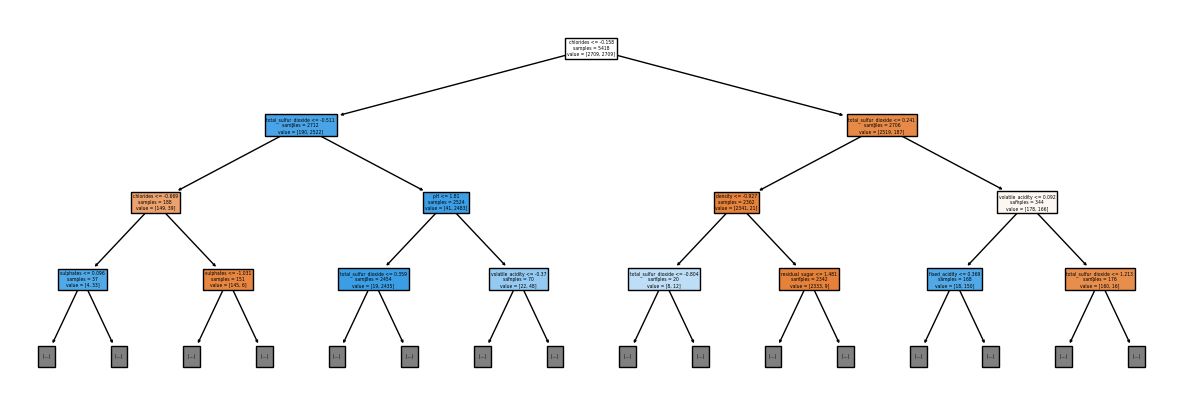

In [351]:
# tree = DecisionTreeClassifier(max_depth = 3, min_samples_split = 150)
# tree.fit(X, y)
# plt.figure(figsize = (15, 5))
# plot_tree(tree, filled=True, proportion = False, impurity = False, feature_names=list(X_tr.columns))
# plt.show();

plt.figure(figsize = (15, 5))
plot_tree(dtc.best_estimator_, max_depth = 3, filled=True,
          proportion = False, impurity = False, feature_names=list(X_tr.columns))
plt.show();

In [352]:
# ROC score
roc_auc_score(y_ts, dtc_y_pred)

0.9870801033591732

In [353]:
# MATRIZ CONFUSÃO
dtc_confusion_matrix = confusion_matrix(y_ts, dtc_y_pred)
dtc_confusion_matrix

array([[1146,   15],
       [  15, 1146]], dtype=int64)

In [354]:
# ACURÁCIA
dtc_acuracia = accuracy_score(y_ts, dtc_y_pred)
print("Acurácia:", dtc_acuracia)

Acurácia: 0.9870801033591732


In [355]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
dtc_recall = recall_score(y_ts, dtc_y_pred)
print("dtc_recall:", dtc_recall)

dtc_recall: 0.9870801033591732


In [356]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
dtc_precision = precision_score(y_ts, dtc_y_pred)
print("precision_score:", dtc_precision)

precision_score: 0.9870801033591732


In [357]:
print(classification_report(y_ts, dtc_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1161
           1       0.99      0.99      0.99      1161

    accuracy                           0.99      2322
   macro avg       0.99      0.99      0.99      2322
weighted avg       0.99      0.99      0.99      2322



In [358]:
dtc_f1_score = f1_score(y_ts, dtc_y_pred)
dtc_f1_score

0.9870801033591732

# Testar o modelo com dados da base df_validation

In [359]:
# Simular dados do mundo real
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print(validation)

In [360]:
prediction = list(dtc.predict(X_val_padronizado[start:end]))
# print(prediction)

In [361]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print('---')
    dtc_y_val = dfp.prediction.shape[0]
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    print('---')
    print(dfp.prediction.value_counts())
    print('---')
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

585 registros lidos
---
68 tipo(s) de vinho(s) NÃO previstos corretamente!
---
prediction
0    67
1     1
Name: count, dtype: int64
---


,seq,validation,prediction
63,553,1,0
64,573,1,0
65,578,1,0
66,580,1,0
67,584,1,0


# Logistic Regression

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Logistic Regression
        </b>
    <br/>&nbsp;
</center>

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [362]:
# Treinar o modelo
lr = LogisticRegression(max_iter =1500)
lr.fit(X_tr, y_tr)

LogisticRegression(max_iter=1500)

In [363]:
# Nos modelos de Classificação com 'Probabilidade' a interpretação corretar é propensão
# Nesse exemplo impresso, a primeira coluna reflete valores com propensão a "0" enquanto que an segunda
# coluna são apresentados valores com propensão a "1"
lr.predict_proba(X_ts).round(4).tolist()[:5]

[[0.0015, 0.9985],
 [0.9982, 0.0018],
 [0.9999, 0.0001],
 [0.0049, 0.9951],
 [0.999, 0.001]]

In [364]:
lr_y_pred = lr.predict(X_ts)

In [365]:
# Valores finais de predição do modelo "lr"
lr_y_pred.tolist()[:5]

[1, 0, 0, 1, 0]

In [366]:
# MATRIZ CONFUSÃO
lr_confusion_matrix = confusion_matrix(y_ts, lr_y_pred)
lr_confusion_matrix

array([[1157,    4],
       [   6, 1155]], dtype=int64)

In [367]:
# ACURÁCIA
lr_acuracia = accuracy_score(y_ts, lr_y_pred)
print("Acurácia:", lr_acuracia)

Acurácia: 0.9956933677863911


In [368]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
lr_recall = recall_score(y_ts, lr_y_pred)
print("lr_recall:", lr_recall)

lr_recall: 0.9948320413436692


In [369]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
lr_precision = precision_score(y_ts, lr_y_pred)
print("precision_score:", lr_precision)

precision_score: 0.996548748921484


In [370]:
print(classification_report(y_ts, lr_y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1161
           1       1.00      0.99      1.00      1161

    accuracy                           1.00      2322
   macro avg       1.00      1.00      1.00      2322
weighted avg       1.00      1.00      1.00      2322



In [371]:
lr_f1_score = f1_score(y_ts, lr_y_pred)
lr_f1_score

0.9956896551724138

In [372]:
prediction = list(lr.predict(X_ts[400:410]))
print(prediction)

[1, 0, 1, 1, 0, 1, 0, 0, 0, 1]


In [373]:
# Simular dados do mundo real
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print(validation)

In [374]:
prediction = list(lr.predict(X_val_padronizado[start:end]))
# print(prediction)

In [375]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print('---')
    lr_y_val = dfp.prediction.shape[0]
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    print('---')
    print(dfp.prediction.value_counts())
    print('---')
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

585 registros lidos
---
43 tipo(s) de vinho(s) NÃO previstos corretamente!
---
prediction
0    42
1     1
Name: count, dtype: int64
---


,seq,validation,prediction
38,500,1,0
39,530,0,1
40,569,1,0
41,573,1,0
42,584,1,0


# Random Forest Classifier

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Random Forest Classifier
        </b>
    <br/>&nbsp;
</center>

[Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

[sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [376]:
# Treinar o modelo
params = {
    'max_features' : np.arange(3, 6, 3),
    'n_estimators': np.arange(200, 400, 200),
    'max_depth': np.arange(2, 10, 2),
    'min_samples_split' : np.arange(50, 100, 50),
    'n_jobs': np.array([-1])
}
rfc = GridSearchCV(
    RandomForestClassifier(),
    params,                                    
    cv=validacao,                                     
    scoring='roc_auc',
#     verbose=5,
)
rfc.fit(X_tr, y_tr)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([2, 4, 6, 8]),
                         'max_features': array([3]),
                         'min_samples_split': array([50]),
                         'n_estimators': array([200]), 'n_jobs': array([-1])},
             scoring='roc_auc')

In [377]:
rfc_y_pred = rfc.predict(X_ts)

In [378]:
# MATRIZ CONFUSÃO
rfc_confusion_matrix = confusion_matrix(y_ts, rfc_y_pred)
rfc_confusion_matrix

array([[1153,    8],
       [   5, 1156]], dtype=int64)

In [379]:
# ACURÁCIA
rfc_acuracia = accuracy_score(y_ts, rfc_y_pred)
print("Acurácia:", rfc_acuracia)

Acurácia: 0.9944013781223083


In [380]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
rfc_recall = recall_score(y_ts, rfc_y_pred)
print("rfc_recall:", rfc_recall)

rfc_recall: 0.9956933677863911


In [381]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
rfc_precision = precision_score(y_ts, rfc_y_pred)
print("precision_score:", rfc_precision)

precision_score: 0.993127147766323


In [382]:
print(classification_report(y_ts, rfc_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1161
           1       0.99      1.00      0.99      1161

    accuracy                           0.99      2322
   macro avg       0.99      0.99      0.99      2322
weighted avg       0.99      0.99      0.99      2322



In [383]:
rfc_f1_score = f1_score(y_ts, lr_y_pred)
rfc_f1_score

0.9956896551724138

In [384]:
# Simular dados do mundo real
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print(validation)

In [385]:
prediction = list(rfc.predict(X_val_padronizado[start:end]))
# print(prediction)

In [386]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print('---')
    rfc_y_val = dfp.prediction.shape[0]
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    print('---')
    print(dfp.prediction.value_counts())
    print('---')
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

585 registros lidos
---
23 tipo(s) de vinho(s) NÃO previstos corretamente!
---
prediction
0    22
1     1
Name: count, dtype: int64
---


,seq,validation,prediction
18,530,0,1
19,537,1,0
20,553,1,0
21,578,1,0
22,584,1,0


# Multi-layer Perceptron (MLP)

<a name="rna"></a>
<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Multi-layer Perceptron (MLP)
        </b>
    <br/>&nbsp;    
</center>

<div style="overflow: auto;">
    <div style="float: left;">
        <a href="https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification">
            Consultar documentação "Multi-layer Perceptron (MLP)"
        </a>
    </div>
    <div style="float: right;">
        <a href="#índice">
            Índice deste notebook
        </a>
    </div>
</div>

In [387]:
params = {
    'hidden_layer_sizes': [(100,), (70,100), (100,70), (100,70,30) ],
    'learning_rate_init': np.logspace(-5,-1,10,base=10),
    'alpha': np.logspace(-7,-3,10,base=10),
}
mlpc = GridSearchCV(
    MLPClassifier(
        activation='relu',
        solver='adam',
        batch_size=256,        
        early_stopping=True,
    ),
    params,
    cv=3,
    scoring='roc_auc',
    verbose=10,
    n_jobs=3,
)
mlpc.fit(X_tr,y_tr)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


GridSearchCV(cv=3, estimator=MLPClassifier(batch_size=256, early_stopping=True),
             n_jobs=3,
             param_grid={'alpha': array([1.00000000e-07, 2.78255940e-07, 7.74263683e-07, 2.15443469e-06,
       5.99484250e-06, 1.66810054e-05, 4.64158883e-05, 1.29154967e-04,
       3.59381366e-04, 1.00000000e-03]),
                         'hidden_layer_sizes': [(100,), (70, 100), (100, 70),
                                                (100, 70, 30)],
                         'learning_rate_init': array([1.00000000e-05, 2.78255940e-05, 7.74263683e-05, 2.15443469e-04,
       5.99484250e-04, 1.66810054e-03, 4.64158883e-03, 1.29154967e-02,
       3.59381366e-02, 1.00000000e-01])},
             scoring='roc_auc', verbose=10)

In [388]:
mlpc_y_pred = mlpc.predict(X_ts)
mlpc_y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [389]:
# MATRIZ CONFUSÃO
mlpc_confusion_matrix = confusion_matrix(y_ts, mlpc_y_pred)
mlpc_confusion_matrix

array([[1156,    5],
       [   3, 1158]], dtype=int64)

In [390]:
# ACURÁCIA
mlpc_acuracia = accuracy_score(y_ts, mlpc_y_pred)
print("Acurácia:", mlpc_acuracia)

Acurácia: 0.9965546942291128


In [391]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
mlpc_recall = recall_score(y_ts, mlpc_y_pred)
print("mlpc_recall:", mlpc_recall)

mlpc_recall: 0.9974160206718347


In [392]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
mlpc_precision = precision_score(y_ts, mlpc_y_pred)
print("precision_score:", mlpc_precision)

precision_score: 0.9957007738607051


In [393]:
mlpc_f1_score = f1_score(y_ts, mlpc_y_pred)
mlpc_f1_score

0.9965576592082616

In [394]:
etc_f1_score > mlpc_f1_score

False

In [395]:
mlpc.best_params_

{'alpha': 1.6681005372000593e-05,
 'hidden_layer_sizes': (100, 70, 30),
 'learning_rate_init': 0.03593813663804626}

In [396]:
roc_auc_score(y_ts, mlpc.predict_proba(X_ts)[:,1])

0.9992740672487482

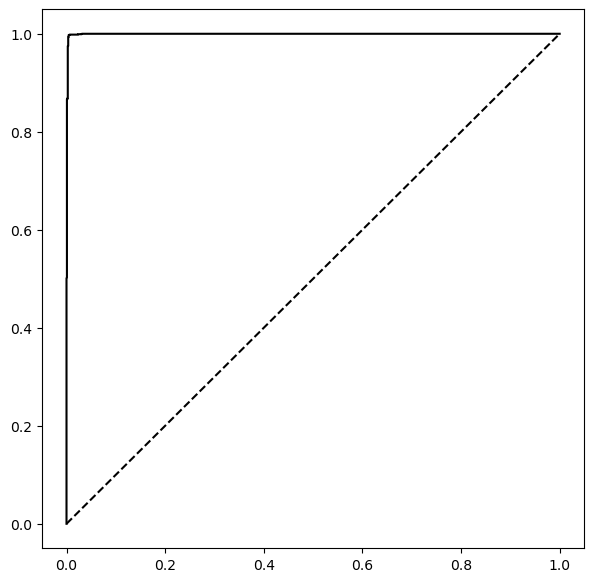

In [397]:
fpr, tpr, ths = roc_curve(y_ts, mlpc.predict_proba(X_ts)[:,1])
plt.figure(figsize=(7,7))
plt.plot(fpr,tpr,'k-')
plt.plot((0,1),(0,1),'k--');

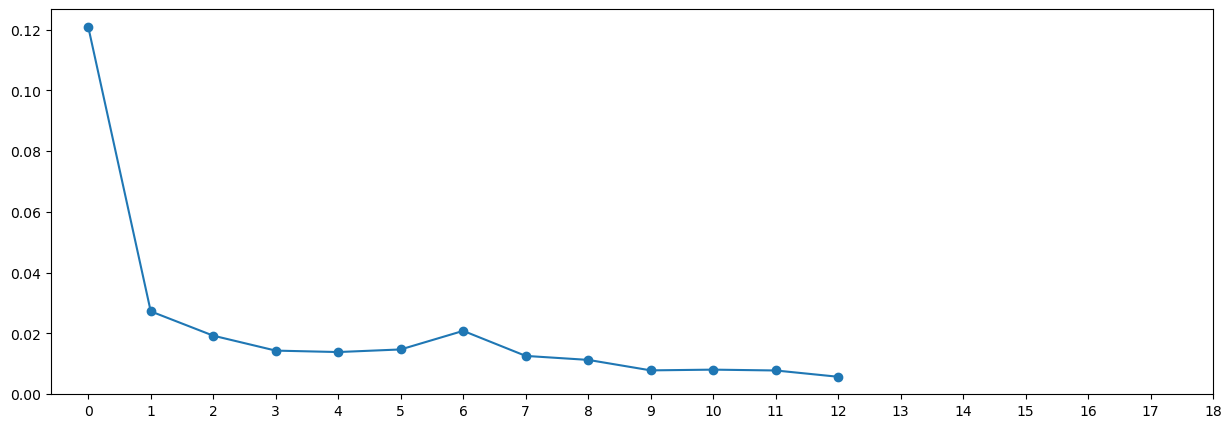

In [398]:
loss = mlpc.best_estimator_.loss_curve_
plt.figure(figsize=(15,5))
plt.plot(loss, 'o-')
plt.xticks(np.arange(19));

In [399]:
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print(validation)

In [400]:
prediction = list(mlpc.predict(X_val_padronizado[start:end]))
# print(prediction)

In [401]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print('---')
    mlpc_y_val = dfp.prediction.shape[0]
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    print('---')
    print(dfp.prediction.value_counts())
    print('---')
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

585 registros lidos
---
15 tipo(s) de vinho(s) NÃO previstos corretamente!
---
prediction
0    14
1     1
Name: count, dtype: int64
---


,seq,validation,prediction
10,357,1,0
11,500,1,0
12,530,0,1
13,537,1,0
14,584,1,0


In [402]:
# MATRIZ CONFUSÃO - df Validação
mlpc_y_pred_val = mlpc.predict(X_val_padronizado)
confusion_matrix(y_val, mlpc_y_pred_val)

array([[146,   1],
       [ 14, 424]], dtype=int64)

# TensorFlow

<a name="rna"></a>
<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            TensorFlow
        </b>
    <br/>&nbsp;    
</center>

In [428]:
print(f'TensorFlow {tf.__version__}')

TensorFlow 2.15.0


In [432]:
# Desativar os avisos
import warnings
warnings.filterwarnings('ignore')

In [433]:
# ESTUDAR ESSE MODELO COM MAIS ATENÇÃO!
# VERIFICAR OS PARAMETROS
# TESTAR A BASE COM O PRÉ-PROESSAMENTO DO KERAS

# Criando o modelo da rede neural
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_tr.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o modelo
model.fit(X_tr, y_tr, epochs=50, batch_size=32, validation_data=(X_ts, y_ts), verbose=False) # Treinando o modelo

In [434]:
# Avaliar o modelo nos dados de teste
evaluation = model.evaluate(X_ts, y_ts)

# Fazer previsões usando o modelo nos dados de teste
predictions = model.predict(X_ts)
predicted_labels = (predictions > 0.5).astype("int32")  # Se for um modelo de classificação binária

# Calcular métricas
model_precision = precision_score(y_ts, predicted_labels)
model_recall = recall_score(y_ts, predicted_labels)
model_f1_score = f1_score(y_ts, predicted_labels)

# Imprimir métricas
print("Perda (Loss):", evaluation[0])
print("Acurácia (Accuracy):", evaluation[1])
print("Precisão (Precision):", model_precision)
print("Recall:", model_recall)
print("F1-score:", model_f1_score)

73/73 [==============================] - 0s 1ms/step
Perda (Loss): 0.02208312414586544
Acurácia (Accuracy): 0.9969853758811951
Precisão (Precision): 0.998272884283247
Recall: 0.9956933677863911
F1-score: 0.9969814575247953


In [435]:
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print(validation)

In [436]:
probabilidades = model.predict(X_val_padronizado[start:end])

# Definindo um limiar
limiar = 0.5

# Convertendo probabilidades em rótulos (0 ou 1) com base no limiar
prediction = [1 if prob >= limiar else 0 for prob in probabilidades]

# print(prediction)

19/19 [==============================] - 0s 1ms/step


In [437]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print('---')
    tf_y_val = dfp.prediction.shape[0]
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    print('---')
    print(dfp.prediction.value_counts())
    print('---')
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

585 registros lidos
---
25 tipo(s) de vinho(s) NÃO previstos corretamente!
---
prediction
0    24
1     1
Name: count, dtype: int64
---


,seq,validation,prediction
20,514,1,0
21,530,0,1
22,552,1,0
23,553,1,0
24,584,1,0


# Combinação de Modelos

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Combinação de Modelos
        </b>
    <br/>&nbsp;
</center>

In [409]:
# QUANDO POSSÍVEL TESTAR E ESTUDAR MELHOR ESSA FUNÇÃO
# Este algorítmo está atralado com a diversidade dos dados para gerar multiplos modelos
# de um mesmo modelo (exemplo: várias versões do KNN) e chegar ao de melhor avaliação final
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
# Bagging
# from sklearn.ensemble import BaggingClassifier 

In [410]:
model = [('LogisticRegression', rfc), ('KNeighborsClassifier', neigh), ('ExtraTreesClassifier', etc)]
combined_model = VotingClassifier(model, voting = 'hard')
medidas = cross_validate(combined_model, X_tr, y_tr, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9948

In [411]:
combined_model.fit(X_tr, y_tr)

VotingClassifier(estimators=[('LogisticRegression',
                              GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
                                           estimator=RandomForestClassifier(),
                                           param_grid={'max_depth': array([2, 4, 6, 8]),
                                                       'max_features': array([3]),
                                                       'min_samples_split': array([50]),
                                                       'n_estimators': array([200]),
                                                       'n_jobs': array([-1])},
                                           scoring='roc_auc')),
                             ('KNeighborsClassifier',
                              GridSearchCV(cv=10,
                                           estimator=KNeighborsClassifier(),
                                           param_grid={'n_neighbors': array([3, 5, 7, 9])},
                                           scoring='roc_auc')),
                             ('ExtraTreesClassifier',
                              GridSearchCV(cv=10,
                                           estimator=ExtraTreesClassifier(),
                                           param_grid={'max_depth': array([ 5, 10]),
                                                       'n_estimators': array([250, 500]),
                                                       'n_jobs': array([-1])},
                                           scoring='roc_auc'))])

In [412]:
validation[:20]

[0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0]

In [413]:
prediction = list(combined_model.predict(X_val_padronizado[start:end]))
# print(prediction)

In [414]:
prediction[:20]

[0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0]

In [415]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print('---')
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    print('---')
    print(dfp.prediction.value_counts())
    print('---')
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

585 registros lidos
---
20 tipo(s) de vinho(s) NÃO previstos corretamente!
---
prediction
0    19
1     1
Name: count, dtype: int64
---


,seq,validation,prediction
15,484,1,0
16,500,1,0
17,530,0,1
18,555,1,0
19,584,1,0


In [416]:
# MATRIZ CONFUSÃO - df Validação
combined_model_y_pred_val = combined_model.predict(X_val_padronizado)
confusion_matrix(y_val, combined_model_y_pred_val)

array([[146,   1],
       [ 19, 419]], dtype=int64)

# Métricas - modelos de classificação

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Métricas - modelos de classificação
        </b>
    <br/>&nbsp;
</center>

In [438]:
# data frame modelos
dfm = {
    'modelo':['Extra Trees Classifier', 'KNeighbors Classifier', 'Decision Tree Classifier',
              'Logistic Regression', 'Random Forest Classifier', 'Neural Network MLPC', 'TensorFlow'],
    'accuracy':[etc_acuracia,neigh_acuracia,dtc_acuracia,lr_acuracia, rfc_acuracia, mlpc_acuracia, evaluation[1]],
    'recall':[etc_recall,neigh_recall,dtc_recall, lr_recall, rfc_recall, mlpc_recall, model_recall],
    'precision':[etc_precision,neigh_precision,dtc_precision, lr_precision, rfc_precision, mlpc_precision, model_precision],
    'f1_score':[etc_f1_score,neigh_f1_score,dtc_f1_score,lr_f1_score, rfc_f1_score, mlpc_f1_score, model_f1_score],
    'ERROS de predição': [etc_y_val, neigh_y_val, dtc_y_val, lr_y_val, rfc_y_val, mlpc_y_val, tf_y_val]
    }    
modelos = pd.DataFrame(dfm)

In [439]:
# Análise de perfomance de cada modelo em relação as métrica da matrix confusão
# modelos.style.highlight_max(subset=list(modelos.columns.drop(['modelo','ERROS de predição'])))
modelos.sort_values(by='f1_score', ascending=False).style.highlight_max(color = "darkred", subset=list(modelos.columns.drop(['modelo'])))

,modelo,accuracy,recall,precision,f1_score,ERROS de predição
6,TensorFlow,0.996985,0.995693,0.998273,0.996981,25
5,Neural Network MLPC,0.996555,0.997416,0.995701,0.996558,15
0,Extra Trees Classifier,0.996124,0.996555,0.995697,0.996126,21
3,Logistic Regression,0.995693,0.994832,0.996549,0.995690,43
4,Random Forest Classifier,0.994401,0.995693,0.993127,0.995690,23
1,KNeighbors Classifier,0.993971,0.991387,0.996537,0.993955,28
2,Decision Tree Classifier,0.987080,0.987080,0.987080,0.987080,68
